# 房价数据集

In [1]:
import pandas as pd

In [3]:
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data',header=None,sep='\s+')

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [6]:
df.columns=['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','b','lstat','medv']

In [7]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


# 简单的数据可视化和分析

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
sns.set(style='whitegrid',context='notebook')
cols=['lstat','indus','nox','rm','medv']

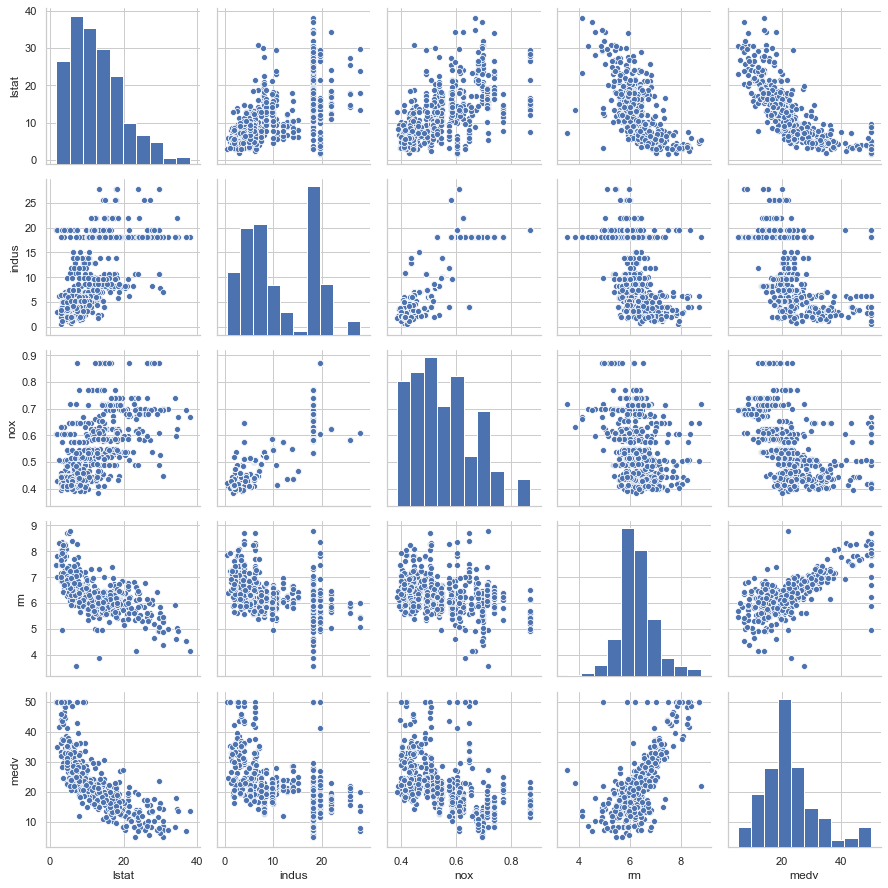

In [15]:
sns.pairplot(df[cols],size=2.5)
plt.tight_layout()
plt.show()

In [17]:
import numpy as np
cm=np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)


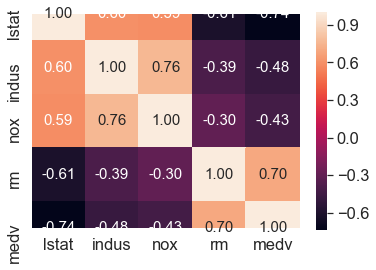

In [19]:
hm=sns.heatmap(cm,
              cbar=True,
              annot=True,
              square=True,
              fmt='.2f',
              annot_kws={'size':15},
              yticklabels=cols,
              xticklabels=cols)
plt.show()

In [20]:
sns.reset_orig()

/Users/xiaonaozhong/anaconda3/envs/p3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
/Users/xiaonaozhong/anaconda3/envs/p3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/Users/xiaonaozhong/anaconda3/envs/p3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/Users/xiaonaozhong/anaconda3/envs/p3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/Users/xiaonaozhong/anaconda3/en

# 用sklearn完成回归并查看系数

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
x=df[['rm']].values
y=df[['medv']].values
slr=LinearRegression()
slr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
y_pred=slr.predict(x)

In [26]:
def lin_regplot(x,y,model):
    plt.scatter(x,y,c='lightblue')
    plt.plot(x,model.predict(x),color='red',linewidth=2)
    return

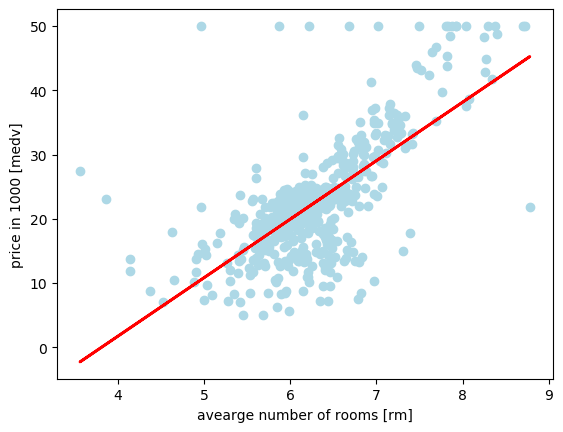

In [27]:
lin_regplot(x,y,slr)
plt.xlabel('avearge number of rooms [rm]')
plt.ylabel('price in 1000 [medv]')
plt.show()

In [32]:
# 增加一个vector
xb=np.hstack((np.ones((x.shape[0],1)),x))
w=np.zeros(x.shape[1])
z=np.linalg.inv(np.dot(xb.T,xb))
w=np.dot(z,np.dot(xb.T,y))

In [33]:
w[1]

array([9.10210898])

In [34]:
w[0]

array([-34.67062078])

# 使用ransac

In [35]:
from sklearn.linear_model import RANSACRegressor

In [36]:
ransac=RANSACRegressor(LinearRegression(),
                      max_trials=100,
                       min_samples=50,
                       loss='absolute_loss',
                       residual_threshold=5.0,
                       random_state=0)

In [37]:
ransac.fit(x,y)

RANSACRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                                n_jobs=None, normalize=False),
                is_data_valid=None, is_model_valid=None, loss='absolute_loss',
                max_skips=inf, max_trials=100, min_samples=50, random_state=0,
                residual_threshold=5.0, stop_n_inliers=inf,
                stop_probability=0.99, stop_score=inf)

In [40]:
inlier_mask=ransac.inlier_mask_

In [41]:
outlier_mask=np.logical_not(inlier_mask)

In [42]:
line_x=np.arange(3,10,1)
line_y_ransac=ransac.predict(line_x[:,np.newaxis])

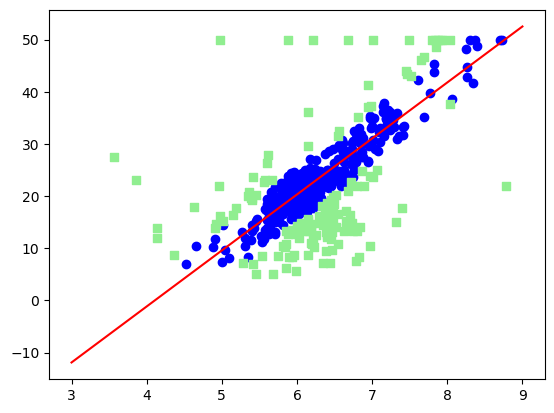

In [45]:
plt.scatter(x[inlier_mask],y[inlier_mask],c='blue',marker='o',label='Inlier')
plt.scatter(x[outlier_mask],y[outlier_mask],c='lightgreen',marker='s',label='Outliers')
plt.plot(line_x,line_y_ransac,color='red')

# 评估性能

In [46]:
from sklearn.model_selection import train_test_split

x=df.iloc[::-1].values
y=df['medv'].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [47]:
slr=LinearRegression()
slr.fit(x_train,y_train)
y_train_pred=slr.predict(x_train)
y_test_pred=slr.predict(x_test)

In [48]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [49]:
mean_squared_error(y_train,y_train_pred)

79.09818363231922

In [50]:
mean_squared_error(y_test,y_test_pred)

83.48355818064906

In [51]:
r2_score(y_train,y_train_pred)

0.06684790138785679

In [52]:
r2_score(y_test,y_test_pred)

-0.002618810090673218

# 添加正则化部分

In [53]:
from sklearn.linear_model import Lasso

lasso=Lasso(alpha=0.1)
lasso.fit(x_train,y_train)
y_train_pred=lasso.predict(x_train)
y_test_pred=lasso.predict(x_test)

In [54]:
mean_squared_error(y_train,y_train_pred)

79.56557859852016

In [55]:
mean_squared_error(y_test,y_test_pred)

83.44719769236437

In [56]:
r2_score(y_train,y_train_pred)

0.06133386081748715

In [57]:
r2_score(y_test,y_test_pred)

-0.0021821287812899826

# 多项式回归与曲线拟合

In [58]:
x=np.array([258.0,270.0,294.0,
           320.0,342.0,368.0,
           396.0,446.0,480.0,586.0])[:,np.newaxis]

In [60]:
y=np.array([236.4,234.4,252.8,298.6,314.2,342.2,360.8,368.0,391.2,390.8])

In [62]:
from sklearn.preprocessing import PolynomialFeatures

In [67]:
lr=LinearRegression()
pr=LinearRegression()

quadratic=PolynomialFeatures(degree=2)
x_qua=quadratic.fit_transform(x)

In [70]:
lr.fit(x,y)
x_fit=np.arange(250,600,10)[:,np.newaxis]
y_lin_fit=lr.predict(x_fit)

In [74]:
pr.fit(x_qua,y)
y_quad_fit=pr.predict(quadratic.fit_transform(x_fit))

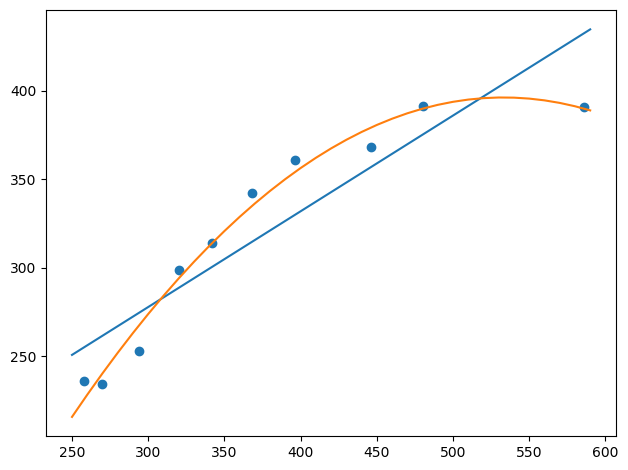

In [76]:
plt.scatter(x,y,label='training points')
plt.plot(x_fit,y_lin_fit,label='linear fit')
plt.plot(x_fit,y_quad_fit,label='quadratic fit')
plt.tight_layout()
plt.show()

# 回归树建模

In [77]:
from sklearn.tree import DecisionTreeRegressor

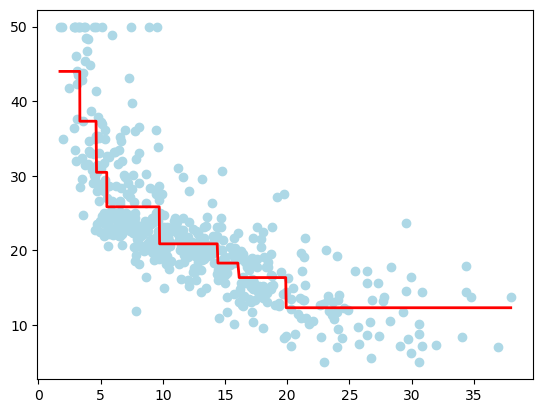

In [79]:
x=df[['lstat']].values
y=df['medv'].values

tree=DecisionTreeRegressor(max_depth=3)
tree.fit(x,y)

sort_idx=x.flatten().argsort()

lin_regplot(x[sort_idx],y[sort_idx],tree)
plt.show()